In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 881.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


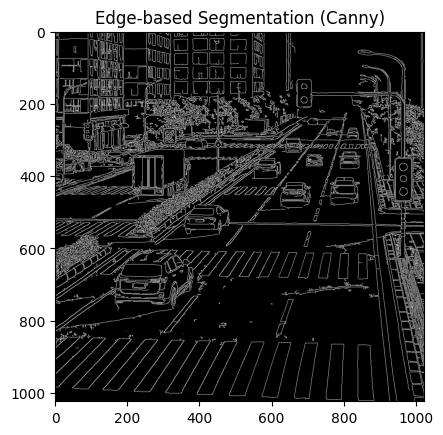

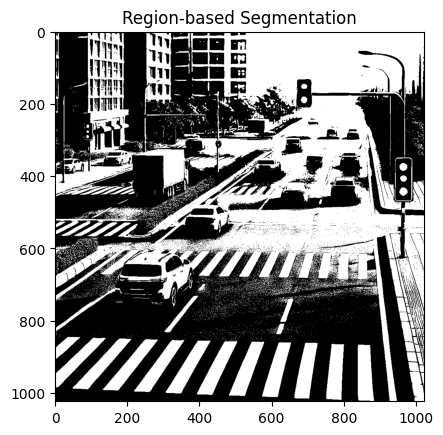

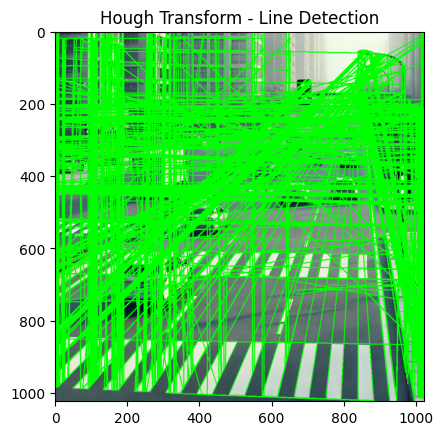

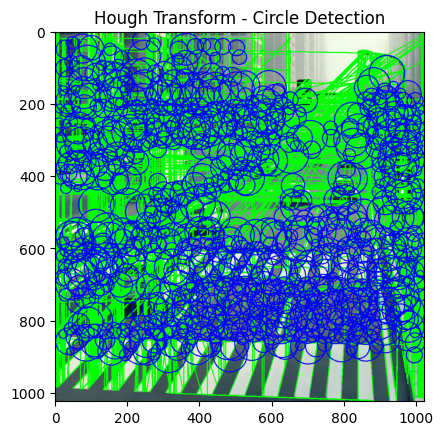

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.4MB/s]

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




image 1/1 /content/road.webp: 640x640 11 cars, 2 trucks, 3 traffic lights, 428.7ms
Speed: 14.4ms preprocess, 428.7ms inference, 33.5ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def edge_based_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge-based Segmentation (Canny)")
    plt.show()
    return edges

def region_based_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(thresholded, cmap='gray')
    plt.title("Region-based Segmentation")
    plt.show()
    return thresholded

def hough_transform(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)

    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Hough Transform - Line Detection")
    plt.show()

    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=50)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Hough Transform - Circle Detection")
    plt.show()



def yolo_object_detection(image_path):
    model = YOLO("yolov8n.pt")
    results = model(image_path, show=True)
    return results


image_path = "road.webp"
edge_based_segmentation(image_path)
region_based_segmentation(image_path)
hough_transform(image_path)
yolo_object_detection(image_path)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/road.webp: 640x640 11 cars, 2 trucks, 3 traffic lights, 251.5ms
Speed: 6.6ms preprocess, 251.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 127MB/s]


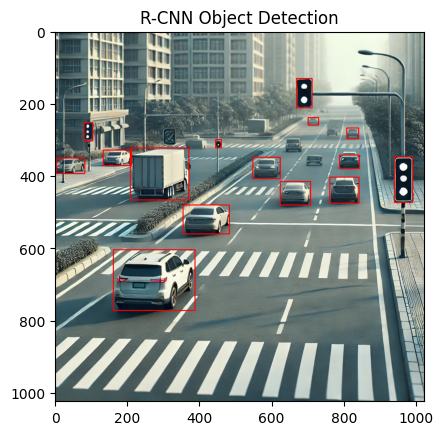

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from ultralytics import YOLO
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

# Task-2: Object Detection (YOLO & R-CNN)

def yolo_object_detection(image_path):
    model = YOLO("yolov8n.pt")
    results = model(image_path, show=True)
    return results

def rcnn_object_detection(image_path):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])

    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    image_np = np.array(image)
    for i, box in enumerate(predictions[0]['boxes']):
        if predictions[0]['scores'][i] > 0.8:
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(image_np)
    plt.title("R-CNN Object Detection")
    plt.show()


image_path = "road.webp"
yolo_object_detection(image_path)
rcnn_object_detection(image_path)



image 1/1 /content/road.webp: 640x640 11 cars, 2 trucks, 3 traffic lights, 229.8ms
Speed: 4.7ms preprocess, 229.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


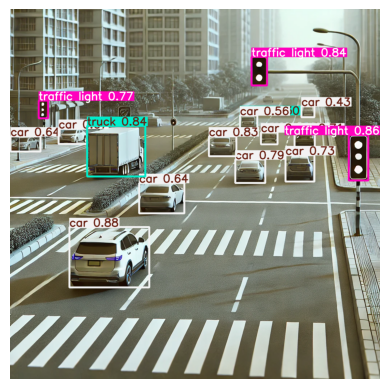

In [ ]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# By YOLO model
model = YOLO("yolov8n.pt")

def yolo_object_detection(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image_path)
    for result in results:

        annotated_frame = result.plot()
        plt.imshow(annotated_frame)
        plt.axis("off")
        plt.show()


        output_path = "yolo_output.jpg"
        cv2.imwrite(output_path, cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR))


image_path = "road.webp"
yolo_object_detection(image_path)



image 1/1 /content/road.webp: 640x640 11 cars, 2 trucks, 3 traffic lights, 223.5ms
Speed: 4.9ms preprocess, 223.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


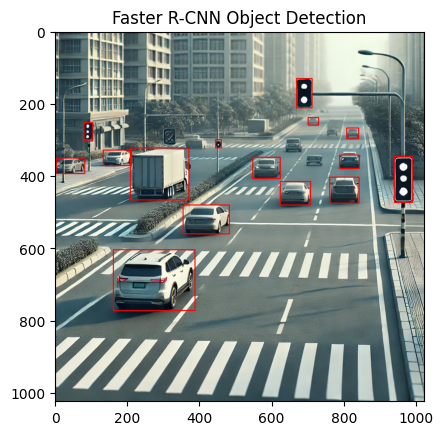

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 102MB/s]


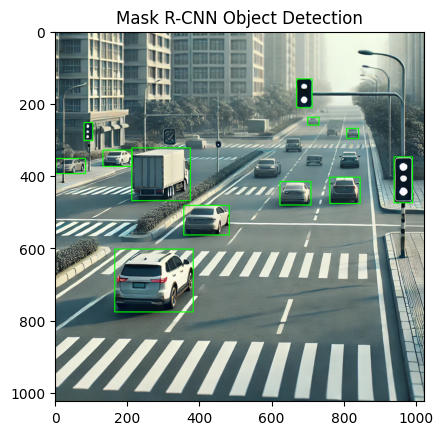

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from ultralytics import YOLO
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt


def yolo_object_detection(image_path):
    model = YOLO("yolov8n.pt")
    results = model(image_path)


    for result in results:
        image_np = result.plot()
        cv2.imwrite("yolo_output.jpg", image_np)

    return results

def faster_rcnn_object_detection(image_path):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])

    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    image_np = np.array(image)
    for i, box in enumerate(predictions[0]['boxes']):
        if predictions[0]['scores'][i] > 0.8:
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(image_np)
    plt.title("Faster R-CNN Object Detection")
    plt.show()

def mask_rcnn_object_detection(image_path):
    model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])

    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    image_np = np.array(image)
    for i, box in enumerate(predictions[0]['boxes']):
        if predictions[0]['scores'][i] > 0.8:
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(image_np)
    plt.title("Mask R-CNN Object Detection")
    plt.show()

image_path = "road.webp"
yolo_object_detection(image_path)
faster_rcnn_object_detection(image_path)
mask_rcnn_object_detection(image_path)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 40.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.21MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.02MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.13MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw


0: 32x640 (no detections), 38.4ms
Speed: 1.6ms preprocess, 38.4ms inference, 1.5ms postprocess per image at shape (1, 3, 32, 640)


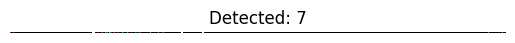

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from ultralytics import YOLO


model = YOLO("yolov8n.pt")

# Load MNIST dataset
transform = transforms.Compose([transforms.Resize((640, 640)), transforms.ToTensor()])
mnist_data = datasets.MNIST(root="./data", train=False, transform=transform, download=True)


def process_mnist_sample(index):
    image, label = mnist_data[index]
    image_np = np.array(image)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_GRAY2RGB)

    results = model(image_np)


    for result in results:
        annotated_frame = result.plot()
        plt.imshow(annotated_frame)
        plt.axis("off")
        plt.title(f"Detected: {label}")
        plt.show()

process_mnist_sample(0)
